In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import seaborn as sns
sns.set()

In [ ]:
top_songs = pd.read_csv("/content/top2018.csv")

In [ ]:
top_songs.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00
mean,0.71646,0.659060,5.330000,-5.677640,0.590000,0.115569,0.195701,0.001584,0.158302,0.484443,119.904180,205206.780000,3.98
std,0.13107,0.145067,3.676447,1.777577,0.494311,0.104527,0.220946,0.013449,0.111662,0.206145,28.795984,40007.893404,0.20
min,0.25800,0.296000,0.000000,-10.109000,0.000000,0.023200,0.000282,0.000000,0.021500,0.079600,64.934000,95467.000000,3.00
25%,0.63550,0.562000,1.750000,-6.650500,0.000000,0.045350,0.040225,0.000000,0.094675,0.341000,95.730750,184680.000000,4.00
50%,0.73300,0.678000,5.000000,-5.566500,1.000000,0.074950,0.109000,0.000000,0.118500,0.470500,120.116000,205047.500000,4.00
75%,0.79825,0.772250,8.250000,-4.363750,1.000000,0.137000,0.247750,0.000031,0.170750,0.641500,140.022750,221493.250000,4.00
max,0.96400,0.909000,11.000000,-2.384000,1.000000,0.530000,0.934000,0.134000,0.636000,0.931000,198.075000,417920.000000,5.00


In [ ]:
top_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64
 10  instrumentalness  100 non-null    float64
 11  liveness          100 non-null    float64
 12  valence           100 non-null    float64
 13  tempo             100 non-null    float64
 14  duration_ms       100 non-null    float64
 15  time_signature    100 non-null    float64
dtypes: float64(13), object(3)
memory usage: 12.6+

Text(0.5, 1.0, 'Length of the song name in characters')

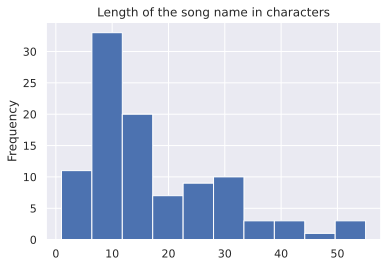

In [ ]:
top_songs["name_len"] = top_songs["name"].apply(lambda x: len(x))
top_songs["name_len"].plot(kind="hist")
plt.title("Length of the song name in characters")

In [ ]:
def get_additional_info_from_songname(songname, info_needed = "songname"):

         
    if "(feat." in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(feat.")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(feat.")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(feat.")])
    elif "(with" in song_components:
        if info_needed == "songname":
            return " ".join(song_components[ : song_components.index("(with")])
        if info_needed == "coauthor":
            coauth = song_components[song_components.index("(with")+1:]
            # this is to get rid of the last parenthesis
            coauth[-1] = coauth[-1][:-1]
            return " ".join(coauth)
        if info_needed == "wordcount":
            return len(song_components[ : song_components.index("(with")])
    else:
       if info_needed == "songname":
            return songname
       elif info_needed == "coauthor":
            return "No colab"
       elif info_needed == "wordcount":
            return len(songname.split())

In [ ]:
top_songs.at[21, "clean_name"] = "Te Bot?"

top_songs.at[46, "clean_name"] = "Finesse (Remix)"
top_songs.at[46, "collaborator"] = "Cardi B"

top_songs.at[47, "clean_name"] = "Back To You"

top_songs.at[84, "clean_name"] = "Perfect"
top_songs.at[84, "collaborator"] = "Beyonce"

top_songs.at[98, "clean_name"] = "Dusk Till Dawn"

([<matplotlib.axis.XTick at 0x7f3dec9fbe10>,
 [Text(0, 0, 'No'), Text(0, 0, 'Yes')])

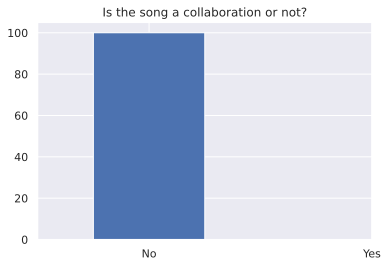

In [ ]:
top_songs["is_collab"] = top_songs["collaborator"].apply(lambda x: 0 if x == "No colab" else 1)

top_songs["is_collab"].value_counts().plot(kind="bar")
plt.title("Is the song a collaboration or not?")
plt.xticks([0,1],["No", "Yes"], rotation=0)

In [ ]:
top_songs["artists"].value_counts()[top_songs["artists"].value_counts() >= 2]

XXXTENTACION       6
Post Malone        6
Drake              4
Marshmello         3
Ed Sheeran         3
Kendrick Lamar     2
Camila Cabello     2
Ariana Grande      2
Migos              2
Dua Lipa           2
Ozuna              2
Khalid             2
Maroon 5           2
Clean Bandit       2
Imagine Dragons    2
Calvin Harris      2
The Weeknd         2
Selena Gomez       2
Name: artists, dtype: int64

In [ ]:
top_songs["collaborator"].value_counts().head()

Beyonce    1
Cardi B    1
Name: collaborator, dtype: int64

In [ ]:
total_number_of_works = top_songs["artists"].value_counts()

for artist, number in top_songs["collaborator"].value_counts().iteritems():
    try:
        total_number_of_works.loc[artist] += number
    except:
        pass

In [ ]:
total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False)

XXXTENTACION       6
Post Malone        6
Drake              4
Marshmello         3
Ed Sheeran         3
Migos              2
Kendrick Lamar     2
Camila Cabello     2
Ariana Grande      2
Cardi B            2
Selena Gomez       2
Ozuna              2
Khalid             2
Maroon 5           2
Clean Bandit       2
Imagine Dragons    2
Calvin Harris      2
The Weeknd         2
Dua Lipa           2
Name: artists, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

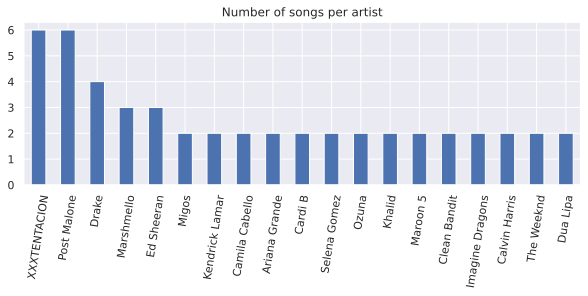

In [ ]:
plt.figure(figsize=(10, 3))
total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False).plot(kind="bar")
plt.title("Number of songs per artist")
plt.xticks(rotation=81)

Text(0.5, 1.0, 'Distribution of songs danceability')

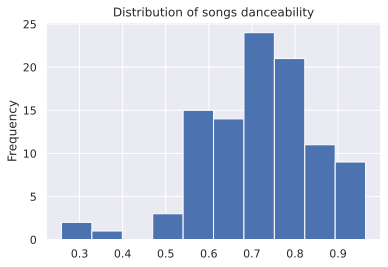

In [ ]:
top_songs["danceability"].plot(kind='hist')
plt.title("Distribution of songs danceability")

In [ ]:
top_artists = list(total_number_of_works[total_number_of_works >= 2].sort_values(ascending=False).index)
top_songs[top_songs["artists"].isin(top_artists)]

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,name_len,clean_name,collaborator,is_collab
0,6DCZcSspjsKoFjzjrWoCd,God's Plan,Drake,0.754,0.449,7.0,-9.211,1.0,0.1090,0.033200,0.000083,0.5520,0.357,77.169,198973.0,4.0,10,NaN,NaN,1
1,3ee8Jmje8o58CHK66QrVC,SAD!,XXXTENTACION,0.740,0.613,8.0,-4.880,1.0,0.1450,0.258000,0.003720,0.1230,0.473,75.023,166606.0,4.0,4,NaN,NaN,1
2,0e7ipj03S05BNilyu5bRz,rockstar (feat. 21 Savage),Post Malone,0.587,0.535,5.0,-6.090,0.0,0.0898,0.117000,0.000066,0.1310,0.140,159.847,218147.0,4.0,26,NaN,NaN,1
3,3swc6WTsr7rl9DqQKQA55,Psycho (feat. Ty Dolla $ign),Post Malone,0.739,0.559,8.0,-8.011,1.0,0.1170,0.580000,0.000000,0.1120,0.439,140.124,221440.0,4.0,28,NaN,NaN,1
4,2G7V7zsVDxg1yRsu7Ew9R,In My Feelings,Drake,0.835,0.626,1.0,-5.833,1.0,0.1250,0.058900,0.000060,0.3960,0.350,91.030,217925.0,4.0,14,NaN,NaN,1
5,7dt6x5M1jzdTEt8oCbisT,Better Now,Post Malone,0.680,0.563,10.0,-5.843,1.0,0.0454,0.354000,0.000000,0.1360,0.374,145.028,231267.0,4.0,10,NaN,NaN,1
6,58q2HKrzhC3ozto2nDdN4,I Like It,Cardi B,0.816,0.726,5.0,-3.998,0.0,0.1290,0.099000,0.000000,0.3720,0.650,136.048,253390.0,4.0,9,NaN,NaN,1
7,7ef4DlsgrMEH11cDZd32M,One Kiss (with Dua Lipa),Calvin Harris,0.791,0.862,9.0,-3.240,0.0,0.1100,0.037000,0.000022,0.0814,0.592,123.994,214847.0,4.0,24,NaN,NaN,1
8,76cy1WJvNGJTj78UqeA5z,IDGAF,Dua Lipa,0.836,0.544,7.0,-5.975,1.0,0.0943,0.040300,0.000000,0.0824,0.510,97.028,217947.0,4.0,5,NaN,NaN,1
9,08bNPGLD8AhKpnnERrAc6,FRIENDS,Marshmello,0.626,0.880,9.0,-2.384,0.0,0.0504,0.205000,0.000000,0.1280,0.534,95.079,202621.0,4.0,7,NaN,NaN,1


Text(0.5, 1.0, "Danceability of most popular artists' songs")

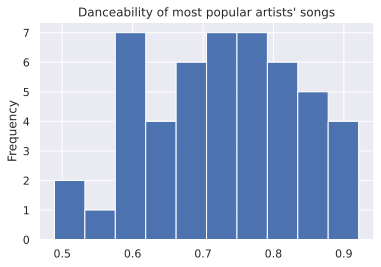

In [ ]:
top_songs[top_songs["artists"].isin(top_artists)]["danceability"].plot(kind="hist")
plt.title("Danceability of most popular artists' songs")

Text(0.5, 1.0, 'Energy Distribution')

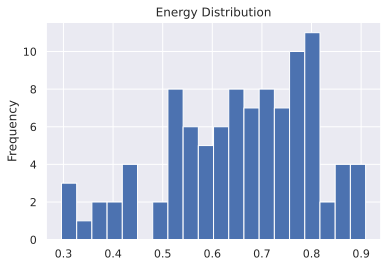

In [ ]:
top_songs["energy"].plot(kind='hist', bins=20)
plt.title("Energy Distribution")

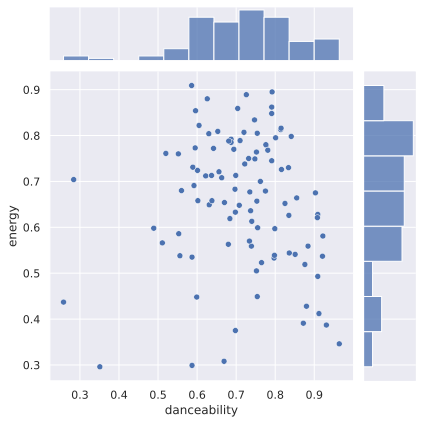

In [ ]:
fig = sns.jointplot(x="danceability", y="energy", data=top_songs)
# fig.fig.set_figwidth(10)
# fig.fig.set_figheight(5)

In [ ]:
top_songs["is_by_top_artist"] = top_songs["artists"].apply(lambda x: 1 if x in top_artists else 0)


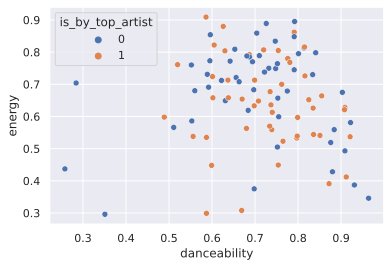

In [ ]:
fig = sns.scatterplot(x="danceability", y="energy", data=top_songs, hue="is_by_top_artist")

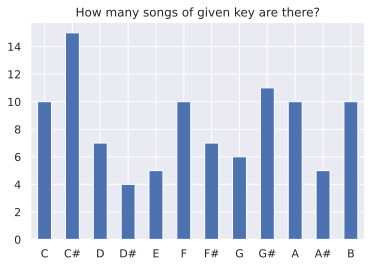

In [ ]:
top_songs["key"].value_counts().sort_index().plot(kind="bar")
plt.title("How many songs of given key are there?")
_ = plt.xticks(range(len(top_songs["key"].value_counts().sort_index().index)),
           ["C", "C#", "D", "D#", "E", "F", "F#", "G", "G#", "A", "A#", "B"],
           rotation=0)

In [ ]:
top_songs["key_string"] = top_songs["key"].replace({0: "C", 1: "C#", 2: "D", 3: "D#", 
                                                    4: "E", 5: "F", 6: "F#", 7: "G",
                                                    8: "G#", 9: "A", 10: "A#", 11: "B"})

Text(0.5, 1.0, 'Does the key has any influence on danceability / energy of the song?')

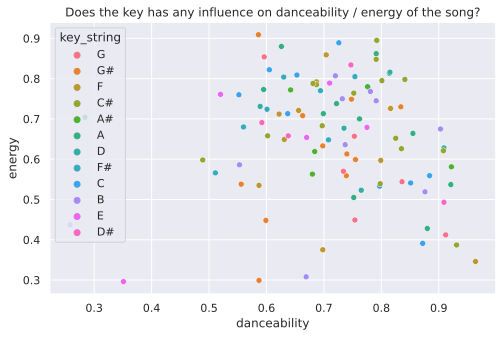

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x="danceability", y="energy", data=top_songs, hue="key_string")
plt.title("Does the key has any influence on danceability / energy of the song?")

Text(0.5, 1.0, 'Loudness distribution')

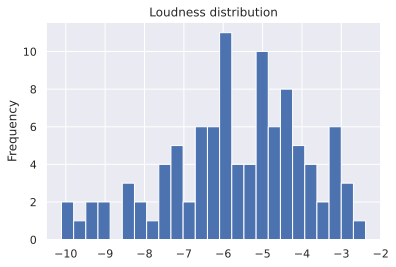

In [ ]:
top_songs["loudness"].plot(kind="hist", bins=25)
plt.title("Loudness distribution")

Text(0.5, 0.98, 'Loudness vs. Energy')

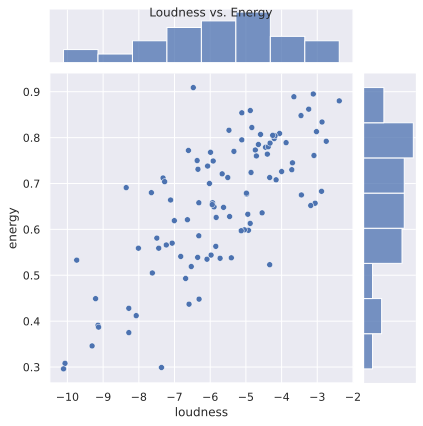

In [ ]:
g = sns.jointplot(x="loudness", y="energy", data=top_songs)
g.fig.suptitle("Loudness vs. Energy")

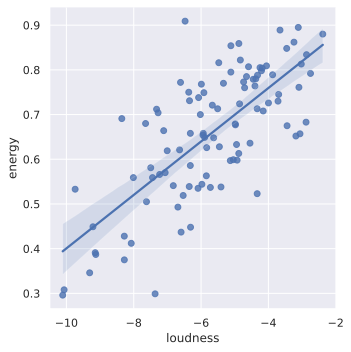

In [ ]:
sns.lmplot(x="loudness", y="energy", data=top_songs)

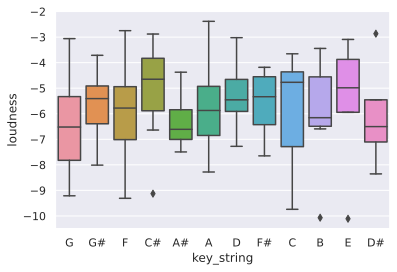

In [ ]:
sns.boxplot(x="key_string", y="loudness", data=top_songs)

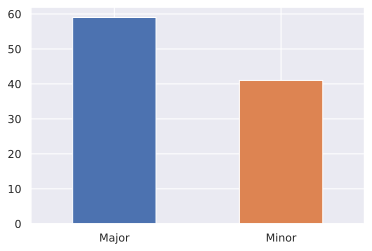

In [ ]:
top_songs["mode"].value_counts().plot(kind='bar', color=sns.color_palette("deep", 2))
_ = plt.xticks([0,1],["Major", "Minor"], rotation=0)

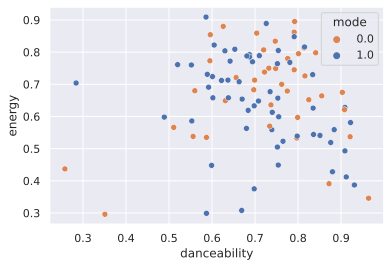

In [ ]:
sns.scatterplot(x="danceability", 
                y="energy", 
                data=top_songs, 
                hue="mode", 
                palette=sns.color_palette("deep", 2)[::-1])

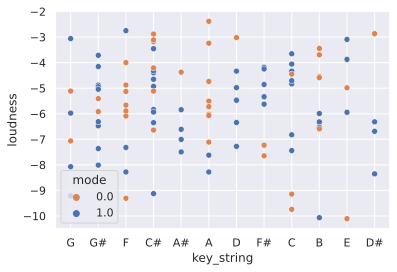

In [ ]:
sns.scatterplot(x="key_string", y="loudness", data=top_songs, 
                hue="mode", palette=sns.color_palette("deep", 2)[::-1])

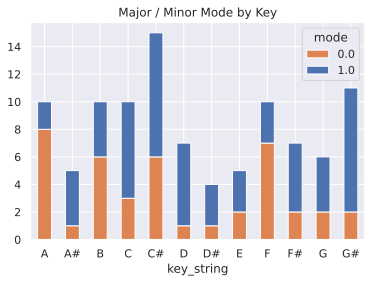

In [ ]:
top_songs.groupby(["key_string","mode"]).size().unstack().plot(kind="bar", 
                                                               stacked=True, 
                                                               color = sns.color_palette("deep", 2)[::-1])
_ = plt.xticks(rotation=0)
_ = plt.title("Major / Minor Mode by Key")

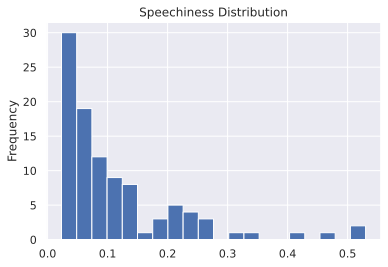

In [ ]:
top_songs["speechiness"].plot(kind='hist', bins=20)
_ = plt.title("Speechiness Distribution")


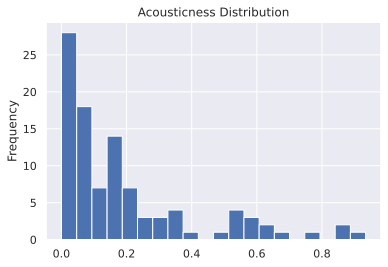

In [ ]:
top_songs["acousticness"].plot(kind="hist", bins=20)
_ = plt.title("Acousticness Distribution")

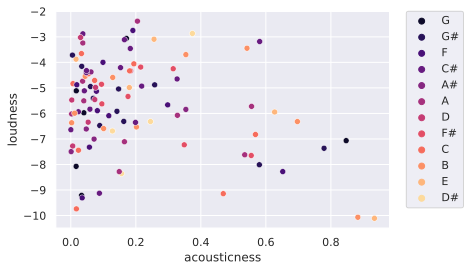

In [ ]:
sns.scatterplot(x="acousticness", y="loudness", 
                data=top_songs, hue="key_string",
                palette=sns.color_palette("magma", 12))
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


No handles with labels found to put in legend.


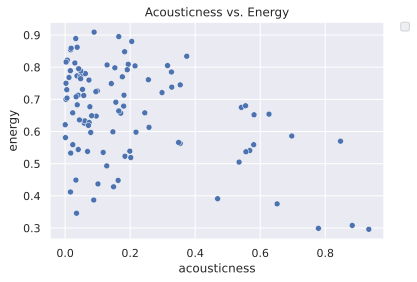

In [ ]:
sns.scatterplot(x="acousticness", y="energy", 
                data=top_songs)
_ = plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
_ = plt.title("Acousticness vs. Energy")

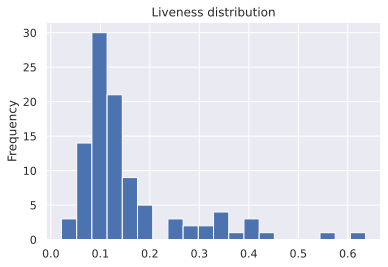

In [ ]:
top_songs["liveness"].plot(kind="hist", bins=20)
_ = plt.title("Liveness distribution")

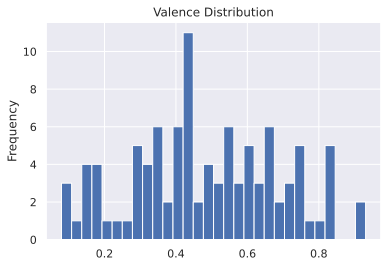

In [ ]:
top_songs["valence"].plot(kind="hist", bins=30)
_ = plt.title("Valence Distribution")


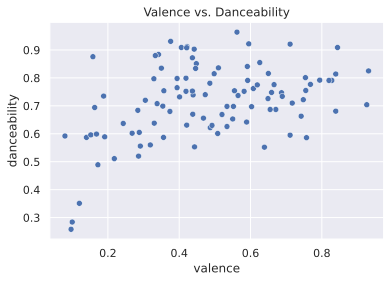

In [ ]:
sns.scatterplot(x="valence", y="danceability", data=top_songs)
_ = plt.title("Valence vs. Danceability")

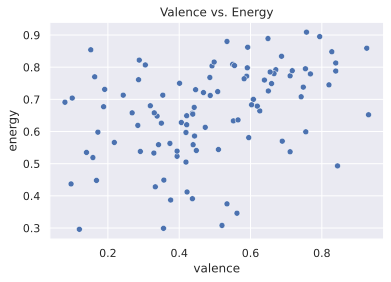

In [ ]:
sns.scatterplot(x="valence", y="energy", data=top_songs)
_ = plt.title("Valence vs. Energy")

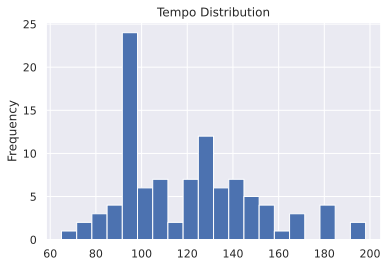

In [ ]:
top_songs["tempo"].plot(kind="hist", bins=20)
_ = plt.title("Tempo Distribution")


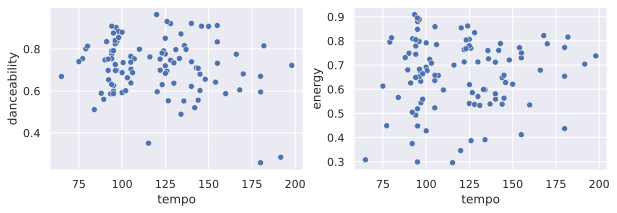

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 3))
sns.scatterplot(x="tempo", y="danceability", data=top_songs, ax=ax[0])
sns.scatterplot(x="tempo", y="energy", data=top_songs, ax=ax[1])

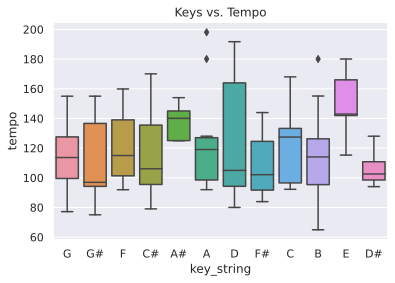

In [ ]:
sns.boxplot(x="key_string", y="tempo", data=top_songs)
_ = plt.title("Keys vs. Tempo")

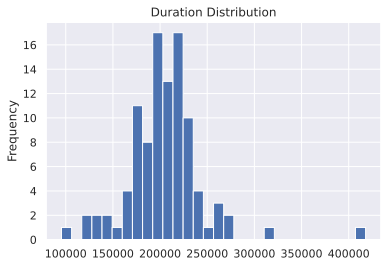

In [ ]:
top_songs["duration_ms"].plot(kind="hist", bins=30)
_ = plt.title("Duration Distribution")


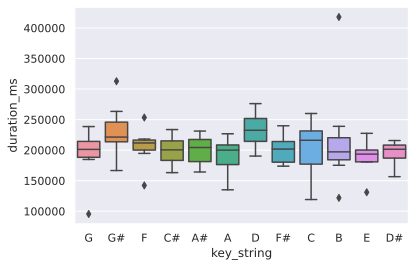

In [ ]:
sns.boxplot(x="key_string", y="duration_ms", data=top_songs)